# Problem Statement 2:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data2 = pd.read_csv(r"C:\Users\lavan\OneDrive\Documents\DATASETS\OnlineRetail (3) capstone.csv", encoding= 'unicode escape')
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data2.shape

(541909, 8)

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data2.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data2.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df_null_percent = round(100*(data2.isna().sum())/len(data2), 2)
df_null_percent

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
data2.dropna(inplace=True)
data2.shape

(406829, 8)

In [9]:
data2.isna().sum().sum()

0

In [10]:
data2.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
data2['CustomerID'] = data2['CustomerID'].astype(str)

In [13]:
data2.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [14]:
data2.CustomerID.nunique()

4372

In [15]:
# Monetary
data2['amount'] = data2['Quantity']*data2['UnitPrice']

In [16]:
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [17]:
rfm_m = data2.groupby('CustomerID')['amount'].sum()
rfm_m = pd.DataFrame(rfm_m)
rfm_m.reset_index(inplace=True)
rfm_m

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [18]:
# Frequency
rfm_f = data2.groupby('CustomerID')['InvoiceDate'].count()
rfm_f = pd.DataFrame(rfm_f)
rfm_f.reset_index(inplace=True)
rfm_f

,CustomerID,InvoiceDate
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [19]:
rfm_f.columns

Index(['CustomerID', 'InvoiceDate'], dtype='object')

In [20]:
rfm_f.columns = ['CustomerID', 'frequency']
rfm_f.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [21]:
# Merging rfm_m and rfm_f dataframes

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID')
rfm.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [22]:
rfm.shape

(4372, 3)

In [23]:
# Recency
data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'], format= '%m/%d/%Y %H:%M')

In [24]:
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
data2.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
amount                float64
dtype: object

In [26]:
# Finding last transaction date
max_date = max(data2['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [27]:
data2['diff'] = max_date-data2['InvoiceDate']
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [28]:
rfm_p = data2.groupby('CustomerID')['diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [29]:
rfm_p['diff'] = rfm_p['diff'].dt.days
rfm_p.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [30]:
# Merging rfm_m, rfm_f and rfm_p dataframes to get final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.tail()

,CustomerID,amount,frequency,diff
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3
4371,18287.0,1837.28,70,42


In [31]:
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [32]:
rfm.describe()

,Amount,Frequency,Recency
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,91.047118
std,8219.345141,232.471608,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,17.000000,16.000000
50%,648.075000,42.000000,49.000000
75%,1611.725000,102.000000,142.000000
max,279489.020000,7983.000000,373.000000


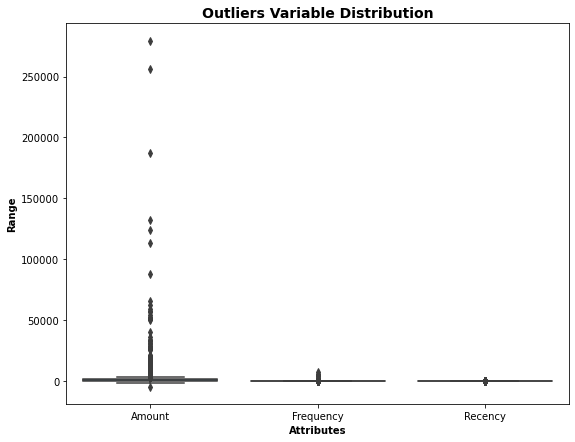

In [33]:
attributes = ['Amount', 'Frequency', 'Recency']
plt.figure(figsize=(9,7))

sns.boxplot(data = rfm[attributes])

plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.show()

In [34]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [35]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [36]:
rfm.describe()

,Amount,Frequency,Recency
count,3629.000000,3629.000000,3629.000000
mean,787.019433,47.736567,97.162855
std,745.191104,42.505471,96.901974
min,-1592.490000,1.000000,0.000000
25%,257.230000,15.000000,21.000000
50%,530.150000,33.000000,58.000000
75%,1065.350000,69.000000,156.000000
max,3563.850000,181.000000,362.000000


In [37]:
# Rescaling the attributes
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-1.05627655, -1.07616428,  2.35153665],
       [ 1.35583983, -0.39380514, -0.23906682],
       [ 1.30257099,  0.59443913, -0.81705007],
       ...,
       [-0.94780621, -0.95851616,  0.85497289],
       [-0.81925771, -0.8173384 , -0.93058249],
       [ 1.40957842,  0.52385025, -0.56934296]])

In [38]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591


In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [40]:
kmeans.labels_

array([0, 3, 3, ..., 0, 1, 3])

In [41]:
# Using the Elbow method to find the right number of clusters

wcss = []
n_clusters = [2,3,4,5,6,7,8,9]
for n in n_clusters:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(rfm_df_scaled)
    wcss.append(kmeans.inertia_)
wcss

[6112.921835859566,
 3708.139311376257,
 2922.974984856264,
 2486.1096099803426,
 2186.061882742724,
 1940.3771589702135,
 1760.7984520581351,
 1591.2961101225083]

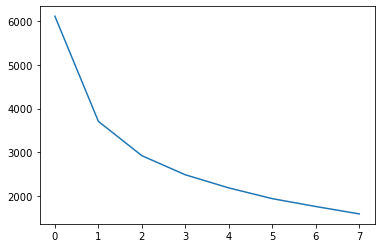

In [42]:
plt.plot(wcss)

In [43]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [44]:
kmeans.labels_

array([0, 2, 1, ..., 0, 2, 1])

In [45]:
rfm['ClusterID'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0
5,12352.0,1545.41,95,35,1


<AxesSubplot:xlabel='ClusterID', ylabel='Amount'>

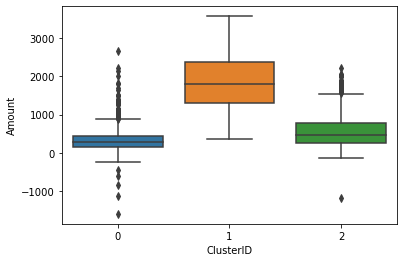

In [46]:
sns.boxplot(x='ClusterID', y='Amount', data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

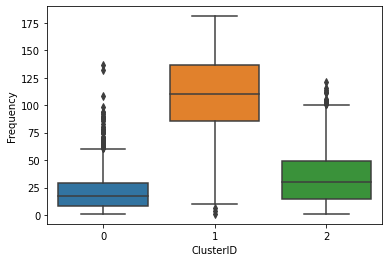

In [47]:
sns.boxplot(x='ClusterID', y='Frequency', data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

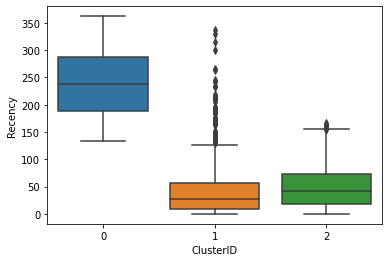

In [48]:
sns.boxplot(x='ClusterID', y='Recency', data=rfm)

In [49]:
rfm[rfm['ClusterID']==2]

,CustomerID,Amount,Frequency,Recency,ClusterID
2,12348.0,1.797240e+03,31,74,2
11,12358.0,1.168060e+03,19,1,2
16,12363.0,5.520000e+02,23,109,2
19,12367.0,1.689000e+02,11,3,2
22,12372.0,1.298040e+03,52,71,2
...,...,...,...,...,...
4363,18274.0,1.776357e-15,22,17,2
4364,18276.0,3.233600e+02,16,20,2
4365,18277.0,9.763000e+01,9,57,2
4366,18278.0,1.739000e+02,9,73,2
